In [40]:
import pandas as pd
from scipy.special import dtype

ImportError: cannot import name 'dtype' from 'scipy.special' (C:\Users\LOQ\.virtualenvs\AI_Classes_Notebooks-Wniik6JL\Lib\site-packages\scipy\special\__init__.py)

### Loading the Pizza Dataset.

In [65]:
df_v1 = pd.read_csv("./data/pizza_price/pizza_v1.csv")
df_v2 = pd.read_csv("./data/pizza_price/pizza_v2.csv")

In [66]:
df_v1.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [67]:
df_v2.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


### Starting the data Cleaning Process

In [68]:
df_v2.nunique()

company             5
price_rupiah       43
diameter           11
topping            12
variant            20
size                6
extra_sauce         2
extra_cheese        2
extra_mushrooms     2
dtype: int64

In [69]:
## Rupee Column
df_v2.price_rupiah = df_v2.price_rupiah.str.replace('Rp', '').str.replace(',', '').astype('float')

In [70]:
df_v2.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000.0,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000.0,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000.0,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000.0,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [72]:
df_v2['diameter'] = df_v2['diameter'].str.replace('inch', '').astype('float')

In [73]:
df_v2 = pd.get_dummies(df_v2, columns=['topping', 'variant', 'size', 'company'], dtype=int)

In [75]:
df_v2.columns

Index(['price_rupiah', 'diameter', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms', 'topping_beef', 'topping_black_papper',
       'topping_chicken', 'topping_meat', 'topping_mozzarella',
       'topping_mushrooms', 'topping_onion', 'topping_papperoni',
       'topping_sausage', 'topping_smoked_beef', 'topping_tuna',
       'topping_vegetables', 'variant_BBQ_meat_fiesta', 'variant_BBQ_sausage',
       'variant_american_classic', 'variant_american_favorite',
       'variant_classic', 'variant_crunchy', 'variant_double_decker',
       'variant_double_mix', 'variant_double_signature',
       'variant_extravaganza', 'variant_gournet_greek',
       'variant_italian_veggie', 'variant_meat_eater', 'variant_meat_lovers',
       'variant_neptune_tuna', 'variant_new_york', 'variant_spicy tuna',
       'variant_spicy_tuna', 'variant_super_supreme', 'variant_thai_veggie',
       'size_XL', 'size_jumbo', 'size_large', 'size_medium', 'size_reguler',
       'size_small', 'company_A', 'company

In [77]:
pd.set_option('future.no_silent_downcasting', True)

df_v2['extra_cheese'] = df_v2['extra_cheese'].replace({'yes': 1, 'no': 0})
df_v2['extra_mushrooms'] = df_v2['extra_mushrooms'].replace({'yes': 1, 'no': 0})
df_v2['extra_sauce'] = df_v2['extra_sauce'].replace({'yes': 1, 'no': 0})

In [79]:
y = df_v2['price_rupiah']
x = df_v2.drop('price_rupiah', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [80]:
tree_regressor = DecisionTreeRegressor(random_state=0)

In [81]:
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [82]:
y_hat = tree_regressor.predict(x_test)

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [85]:
mean_absolute_percentage_error(y_test, y_hat)

np.float64(0.037977174911564056)

In [86]:
mean_absolute_error(y_test, y_hat)

np.float64(1923.076923076923)

In [87]:
mean_squared_error(y_test, y_hat)

np.float64(35384615.384615384)

In [88]:
from matplotlib import pyplot as plt

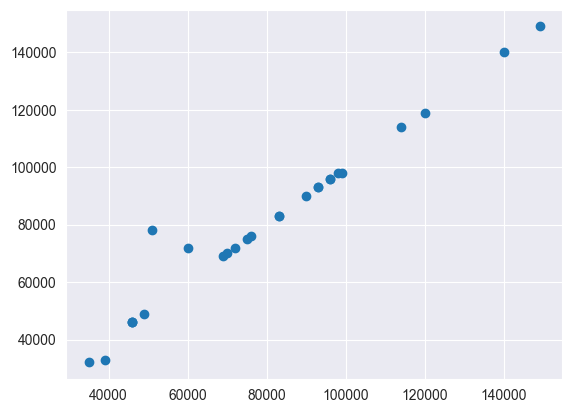

In [91]:
plt.scatter(y_test, y_hat)
# plt.show()